<h1>DecisionTree Classifier

In [2]:
import pandas as pd 
import numpy as np
df_classwise=pd.read_csv("/kaggle/input/classwise-balanced-ciciot-2023/ClassWise_Labeled_Balanced_Dataset.csv")
# df_binary_Normal=pd.read_csv("/kaggle/input/binary-classified-ciciot-2023-dataset/Normal_baised_data.csv")
df_perfect_binary=pd.read_csv("/kaggle/input/binary-classified-ciciot-2023-dataset/EqualBinaryData_CICIoT_2023 (1).csv")
df_classwise=pd.read_csv("/kaggle/input/top-5-classes/CICIoT_2023_5_big_classes.csv")
# df_attack_bairds=pd.read_csv("/kaggle/input/binary-classified-ciciot-2023-dataset/Attack_baised_data.csv")

<h3>For Normal_Baised_data.csv : DecisionTreeClassifier got highest accuracy 94% on this parameters(max_depth=20,min_samples_split=20,random_state=42).
</h3>
<br>

<h3>For EqualBinaryData_CICIoT_2023.csv : DecisionTreeClassifier got highest 94% with checking the overfitting validtions</h3>

In [150]:



#For Perfect binary 
# df=pd.DataFrame(df_classwise)
# df=df.drop(columns=[ 'Unnamed: 0','Number','Unnamed: 0.1'],axis=1)

# df=df.sample(frac=1,random_state=42).reset_index(drop=True)
# data=df[:50000]
# samples['Label'].value_counts()
# samples=data[data['Label']==0]
# attacks=data[data['Label']==1]
# attacks=attacks.sample(n=5000,random_state=42).reset_index(drop=True)
# attacks
# samples=pd.concat([attacks,samples])
# samples=samples.sample(frac=1)

# df=df[50000:]

#For Multi class
df=pd.DataFrame(df_classwise)
# df=df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','Number'],axis=1)
df=df.drop(columns=['Unnamed: 0','Number'],axis=1)


# df.columns
df.columns
df

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Variance,Label
0,31.52,6,134.65,496.140111,0.01,0.0,0.0,0.25,0.99,0.0,...,1.0,78270.0,60.0,2922.0,782.7,1032.608001,782.7,0.002016,1.066279e+06,DDoS
1,20.00,6,64.00,28401.300108,0.00,1.0,0.0,0.00,0.00,0.0,...,1.0,6000.0,60.0,60.0,60.0,0.000000,60.0,0.000035,0.000000e+00,DDoS
2,20.00,6,64.00,43919.413613,1.00,0.0,1.0,0.00,0.00,0.0,...,1.0,6000.0,60.0,60.0,60.0,0.000000,60.0,0.000027,0.000000e+00,DDoS
3,22.40,6,99.40,103.573291,0.00,0.0,0.0,0.30,0.60,0.0,...,1.0,1206.0,66.0,230.0,120.6,58.795691,120.6,0.010770,3.456933e+03,Benign
4,20.00,6,64.00,5831.091339,0.00,0.0,0.0,0.00,1.00,0.0,...,1.0,540.0,54.0,54.0,54.0,0.000000,54.0,0.000172,0.000000e+00,Spoofing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106150,11.20,17,64.00,355449.491525,0.00,0.1,0.0,0.00,0.00,0.0,...,1.0,3827.0,74.0,1292.0,382.7,500.544603,382.7,0.000003,2.505449e+05,Spoofing
2106151,8.00,17,64.00,5701.881457,0.00,0.0,0.0,0.00,0.00,0.0,...,1.0,55400.0,554.0,554.0,554.0,0.000000,554.0,0.000176,0.000000e+00,Mirai
2106152,8.00,17,64.00,29585.271919,0.00,0.0,0.0,0.00,0.00,0.0,...,1.0,6000.0,60.0,60.0,60.0,0.000000,60.0,0.000034,0.000000e+00,DDoS
2106153,18.00,6,72.40,124.542102,0.10,0.0,0.0,0.20,0.50,0.0,...,0.9,951.0,60.0,386.0,95.1,102.305045,95.1,0.008062,1.046632e+04,Benign


In [163]:
# df=df.drop(columns=['Number'],axis=1)
# attacks=df[df['Label']==1]
# attacks['Label'].value_counts()
# attacks=attacks.sample(n=573107)
# normal=df[df['Label']==0]
# normal=normal.sample(n=573107)

# new_df=pd.concat([normal,attacks])
# df=new_df.sample(frac=1,random_state=42).reset_index(drop=True)
# target_values=['MIRAI','Normal','DDOS','SPOOFING']
target_values=["DDoS","Spoofing","Mirai","Benign"]
df=df[df['Label'].isin(target_values)]
# df=df.drop(['IPv', 'LLC', 'Tot size'],axis=1)
# df=df[['DHCP','SSH','fin_count','ICMP','Variance','fin_flag_number','DNS','rst_flag_number','rst_count','syn_count','Label']]
df['Label'].value_counts()
df.columns
df

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Variance,Label
0,0.2,47,65.27,2920.641464,0.0,0.0,0.0,0.0,0.01,0.0,...,0.99,57614.0,60.0,592.0,576.14,90.641821,576.14,0.000344,8215.939798,Mirai
1,8.0,17,64.00,4325.987046,0.0,0.0,0.0,0.0,0.00,0.0,...,1.00,55400.0,554.0,554.0,554.00,0.000000,554.00,0.000232,0.000000,Mirai
3,8.0,17,65.91,8116.227408,0.0,0.0,0.0,0.0,0.00,0.0,...,1.00,6292.0,60.0,352.0,62.92,29.200000,62.92,0.000123,852.640000,DDoS
4,0.0,47,64.00,7965.632893,0.0,0.0,0.0,0.0,0.00,0.0,...,1.00,59200.0,592.0,592.0,592.00,0.000000,592.00,0.000128,0.000000,Mirai
5,16.4,6,52.00,435.066697,0.0,0.0,0.0,0.0,0.70,0.0,...,1.00,1988.0,54.0,1214.0,198.80,359.564181,198.80,0.002335,129286.400000,Spoofing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106051,32.0,6,174.40,203.021579,0.1,0.0,0.0,0.5,1.00,0.0,...,1.00,1585.0,66.0,675.0,158.50,189.211375,158.50,0.006168,35800.944444,Spoofing
2106052,15.2,17,82.20,197.134102,0.0,0.0,0.0,0.2,0.30,0.0,...,1.00,1310.0,66.0,170.0,131.00,42.970274,131.00,0.005483,1846.444444,Spoofing
2106053,0.0,47,64.00,8239.311672,0.0,0.0,0.0,0.0,0.00,0.0,...,1.00,59200.0,592.0,592.0,592.00,0.000000,592.00,0.000123,0.000000,Mirai
2106054,0.0,1,64.00,51922.555088,0.0,0.0,0.0,0.0,0.00,0.0,...,1.00,6000.0,60.0,60.0,60.00,0.000000,60.00,0.000019,0.000000,DDoS


In [165]:
# df=df.drop(,axis=1)
import numpy as np
df['Label'].value_counts()

Label
DDoS        421222
Spoofing    421209
Benign      421209
Mirai       421200
Name: count, dtype: int64

# Binary Data

# Preprocessing

<h3>For multi class Target Labels</h3>

In [152]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()


In [153]:
df.isnull().sum()

Header_Length       0
Protocol Type       0
Time_To_Live        0
Rate                0
fin_flag_number     0
syn_flag_number     0
rst_flag_number     0
psh_flag_number     0
ack_flag_number     0
ece_flag_number     0
cwr_flag_number     0
ack_count           0
syn_count           0
fin_count           0
rst_count           0
HTTP                0
HTTPS               0
DNS                 0
Telnet              0
SMTP                0
SSH                 0
IRC                 0
TCP                 0
UDP                 0
DHCP                0
ARP                 0
ICMP                0
IGMP                0
IPv                 0
LLC                 0
Tot sum             0
Min                 0
Max                 0
AVG                 0
Std                87
Tot size            0
IAT                 0
Variance           87
Label               0
dtype: int64

In [166]:
(np.isinf(df['Rate'])).value_counts()
df=df.replace(np.inf,np.nan)
(np.isinf(df['Rate'])).value_counts()
df.isnull().sum()
df=df.dropna()

<h2>Imputer cannot handle the infinite values in the dataset 

In [ ]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='mean')
test=df.copy()
test=test.select_dtypes(include='number')
impute.fit_transform(test)

We will replace the infinite with null values and just drop the null values as they are very few.

In [134]:
df

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Variance,Label
0,20.00,6,64.0,23374.409273,1.00,0.0,1.00,0.00,0.00,0.0,...,1.0,6000,60,60,60.00,0.000000,60.00,0.000043,0.000000e+00,DDOS
1,20.00,6,64.0,34236.421517,1.00,0.0,1.00,0.00,0.00,0.0,...,1.0,6000,60,60,60.00,0.000000,60.00,0.000029,0.000000e+00,DDOS
2,20.12,6,64.0,10541.630642,0.99,0.0,0.99,0.01,0.01,0.0,...,1.0,6288,60,348,62.88,28.800000,62.88,0.000097,8.294400e+02,DDOS
3,20.00,6,64.0,57080.892760,1.00,0.0,1.00,0.00,0.00,0.0,...,1.0,6000,60,60,60.00,0.000000,60.00,0.000018,0.000000e+00,DDOS
4,20.00,6,64.0,66841.498008,1.00,0.0,1.00,0.00,0.00,0.0,...,1.0,6000,60,60,60.00,0.000000,60.00,0.000015,0.000000e+00,DDOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82190,30.80,6,82.7,129.177133,0.00,0.0,0.00,0.20,1.00,0.0,...,1.0,8011,60,2962,801.10,1015.549818,801.10,0.007752,1.031341e+06,Normal
82191,32.00,6,64.0,595.063347,0.00,0.0,0.00,0.10,1.00,0.0,...,1.0,15625,1514,1999,1562.50,153.370467,1562.50,0.001699,2.352250e+04,Normal
82192,32.00,6,162.6,84.308465,0.00,0.0,0.00,0.30,1.00,0.0,...,1.0,878,66,156,87.80,36.593260,87.80,0.011861,1.339067e+03,Normal
82193,32.00,6,181.6,725.846500,0.00,0.0,0.00,0.10,1.00,0.0,...,1.0,4059,66,1514,405.90,604.712687,405.90,0.001389,3.656774e+05,Normal


In [167]:
df=df.dropna()
df.isnull().sum()


Header_Length      0
Protocol Type      0
Time_To_Live       0
Rate               0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Variance           0
Label              0
dtype: int64

<h2>Decision Tree With</h2>

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [169]:
df=df.sample(frac=1,random_state=42)


In [1]:
df.reset_index(drop=True,inplace=True)
df.columns
df

NameError: name 'df' is not defined

In [171]:
# LB=LabelEncoder()
# df=[]
df=df.sample(n=)
X=df.drop('Label',axis=1)
y=df['Label']
y_encoded=LB.fit_transform(y)


In [ ]:
# y_encoded=pd.DataFrame(y_encoded)
# y_encoded.value_counts()

In [172]:
from sklearn.model_selection import train_test_split

# 1. First Split: Separate the Final Test Set (10%)
# This X_test is your "Unseen Data" for the final report
X_temp, X_test, y_temp, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)

# 2. Second Split: Separate Train (80%) and Validation (10%) from the remaining 90%
# 0.111 of 90% is approx 10% of the total
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.111, random_state=42)

# Usage:
# 1. Train on X_train
# 2. Test different max_depths on X_val to pick the best one
# 3. Run the winner on X_test for your Final Report accuracy

In [131]:
# from sklearn.model_selection import GridSearchCV

# # Define the grid of parameters to test
# param_grid = {
#     'max_depth': [10, 15, 20, 25, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['gini', 'entropy'] # 'entropy' is often better for complex patterns
# }

# grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Accuracy: {grid_search.best_score_}")

In [178]:
DT=DecisionTreeClassifier(max_depth=20,min_samples_split=15,random_state=42)
check=DT.fit(X_train,y_train)


In [179]:
y_pre=DT.predict(X_val)
print("Accuracy:",accuracy_score(y_val,y_pre))
y_pre_back=LB.inverse_transform(y_pre)
y_val_back=LB.inverse_transform(y_val)

print("Classification report:\n",classification_report(y_val_back,y_pre_back))
# df['Label'].value_counts()

Accuracy: 0.9652320634996079
Classification report:
               precision    recall  f1-score   support

      Benign       0.91      0.96      0.93     41973
        DDoS       1.00      1.00      1.00     42149
       Mirai       1.00      1.00      1.00     41742
    Spoofing       0.96      0.90      0.93     42452

    accuracy                           0.97    168316
   macro avg       0.97      0.97      0.97    168316
weighted avg       0.97      0.97      0.97    168316



In [ ]:
# #FOr binary classification
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# cm = confusion_matrix(y_val, y_pre)

# cm_df = pd.DataFrame(cm, index=['Actual Normal', 'Actual Intrusion'], 
#                          columns=['Predicted Normal', 'Predicted  Intrusion'])

# print("Confusion Matrix (Counts):")
# print(cm_df)


# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix: Correct vs Wrong Predictions')
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label')
# plt.show()

<h2>Validating accuracy:</h2>

<h3>Train and Test accuracy comparision</h3>

In [ ]:
samples=samples.replace(np.inf,np.nan)
(np.isinf(samples['Rate'])).value_counts()
samples.isnull().sum()
samples=samples.dropna()

In [175]:
# #Test data
# test=samples.copy()
# test['Label'].value_counts()
# X_test = test.drop('Label', axis=1)
# y_test = test['Label']
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Difference:        {train_acc - test_acc:.4f}")

if train_acc > 0.99 and (train_acc - test_acc) > 0.05:
    print("\nDIAGNOSIS: High probability of OVERFITTING.")
elif train_acc < 0.80:
    print("\nDIAGNOSIS: Likely UNDERFITTING (Model is too simple).")
else:
    print("\nDIAGNOSIS: Good Fit (Generalized well).")
    


Training Accuracy: 0.9610
Testing Accuracy:  0.9574
Difference:        0.0035

DIAGNOSIS: Good Fit (Generalized well).


<h2>Cross Validation:</h2>

In [176]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DT, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

if scores.std() > 0.03:
    print("\nWarning: High variance. Model is unstable (Overfitting).")
else:
    print("\nModel is stable.")

Cross-Validation Scores: [0.95966976 0.96177679 0.96241186 0.96128119 0.96205574]
Mean Accuracy: 0.9614
Standard Deviation: 0.0010

Model is stable.


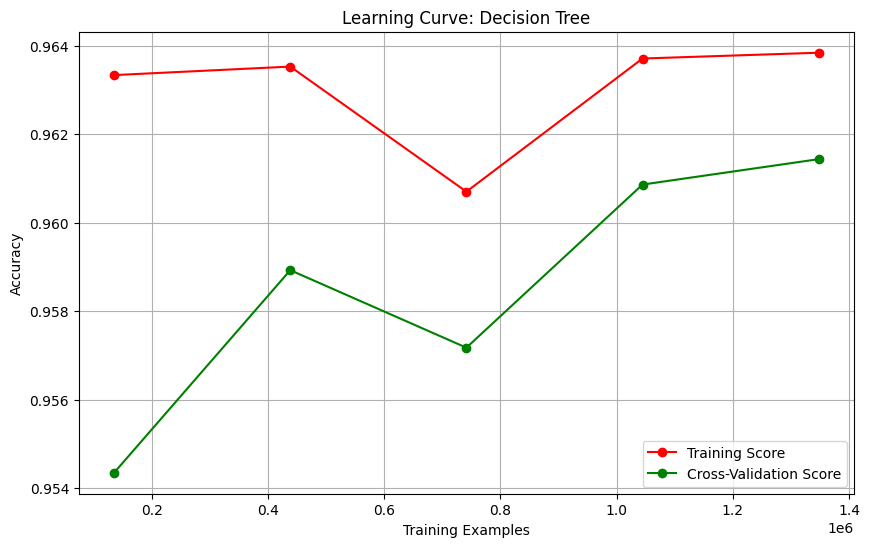

In [177]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y_encoded):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y_encoded, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5) # Check at 10%, 30%, ... 100% of data
    )
    
    # Calculate means
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")
    
    plt.title("Learning Curve: Decision Tree")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


plot_learning_curve(DT, X, y_encoded)

<h2>Model Saving</h2>

In [ ]:
test['Label'].value_counts()

In [ ]:
import joblib

joblib.dump(DT,"/kaggle/working/MultiClass_DTC_95%.joblib")
# joblib.dump(DT,"/kaggle/working/Binary_94%_Classifier_DTC.joblib")


In [ ]:
# df=df[df['Label']!='Normal']

In [ ]:
# # df.fillna({'Variance':df['Variance'].mean()},inplace=True)
# df.fillna({'Std':df['Std'].mean()},inplace=True)

In [ ]:
# from sklearn.metrics import roc_auc_score

# # Get probability scores (not just 0 or 1 labels)
# y_probs = DT.predict_proba(X_test)[:, 1] 

# # Calculate the score
# auc_score = roc_auc_score(y_test, y_probs)
# print(f"My Decision Tree AUC: {auc_score:.3f}")

In [ ]:
samples=samples.replace(np.inf,np.nan)
(np.isinf(samples['Rate'])).value_counts()
samples.isnull().sum()
samples=samples.dropna()

Loading Model & Data...

--- 1. Evaluating Overall Performance (Fig 11) ---
Accuracy:  0.9563 (Paper Baseline: ~99%)
Precision: 0.9574
Recall:    0.9563
F1-Score:  0.9562
FAR:       0.0145

--- 2. Confusion Matrix (Table 3) ---


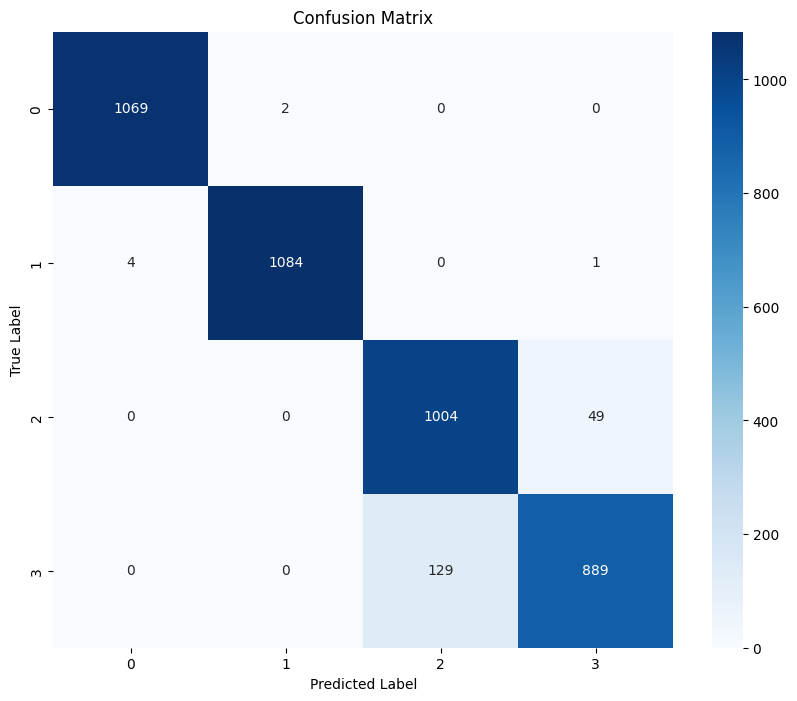


--- 3. ROC Curve (Fig 7 & 10) ---


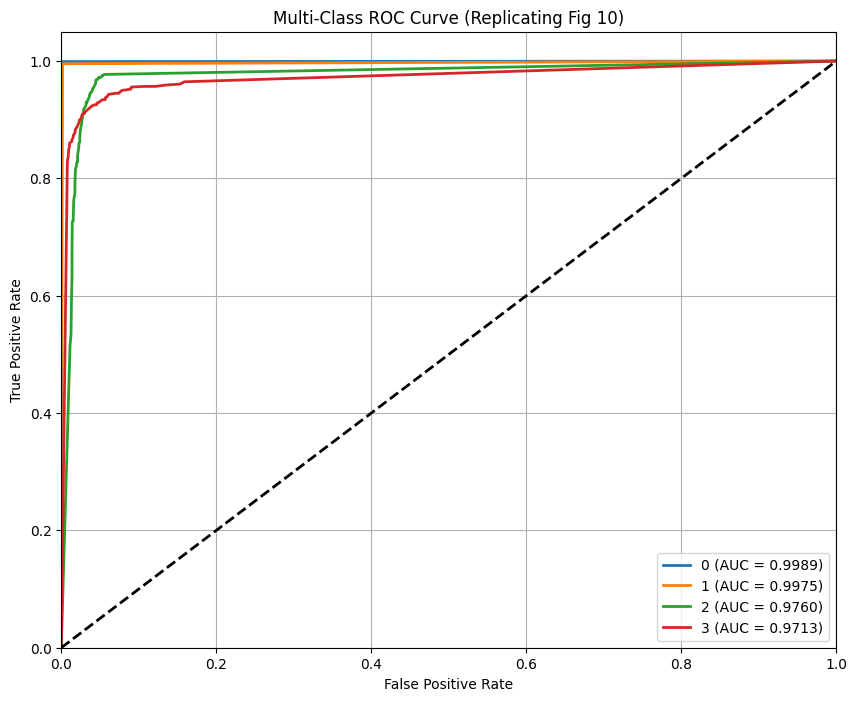

In [43]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
from sklearn.preprocessing import label_binarize

# --- Configuration ---
# MODEL_PATH = "decision_tree_model.joblib"
# Use your TEST dataset (not the one used for training!)
# TEST_DATA_PATH = "test_sample_1000.csv" 
# ---------------------

def calculate_far(y_true, y_pred):
    """Calculates False Alarm Rate (FAR) from Confusion Matrix"""
    # FAR = FP / (FP + TN)
    cm = confusion_matrix(y_true, y_pred)
    # For binary: cm[0,0]=TN, cm[0,1]=FP, cm[1,0]=FN, cm[1,1]=TP
    # For multi-class, we calculate average FAR or per-class FAR
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return fp / (fp + tn) if (fp + tn) > 0 else 0.0
    else:
        # Macro-average FAR for multi-class
        fp = cm.sum(axis=0) - np.diag(cm)  
        cn = cm.sum(axis=1) - np.diag(cm)
        tn = cm.sum() - (fp + cn + np.diag(cm))
        return np.mean(fp / (fp + tn))

def plot_multiclass_roc(model, X_test, y_test, classes):
    """Plots ROC Curve for Multi-class (One-vs-Rest)"""
    y_test_bin = label_binarize(y_test, classes=classes)
    y_score = model.predict_proba(X_test)
    
    n_classes = len(classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    plt.figure(figsize=(10, 8))
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2,
                 label=f'{classes[i]} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve (Replicating Fig 10)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

def main():
    print("Loading Model & Data...")
    # DT = joblib.load(MODEL_PATH)
    # df = pd.read_csv(TEST_DATA_PATH)
    
    # X_test = samples.drop('Label', axis=1)
    # y_test = samples['Label']
    
    print("\n--- 1. Evaluating Overall Performance (Fig 11) ---")
    y_pred = DT.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    far = calculate_far(y_test, y_pred)
    
    print(f"Accuracy:  {acc:.4f} (Paper Baseline: ~99%)")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"FAR:       {far:.4f}")

    print("\n--- 2. Confusion Matrix (Table 3) ---")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=DT.classes_, yticklabels=DT.classes_)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    print("\n--- 3. ROC Curve (Fig 7 & 10) ---")
    if len(DT.classes_) == 2:
        # Binary ROC
        y_probs = DT.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=DT.classes_[1])
        roc_auc = auc(fpr, tpr)
        
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Binary ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
        print(f"Binary AUC: {roc_auc:.4f}")
    else:
        # Multi-class ROC
        plot_multiclass_roc(DT, X_test, y_test, DT.classes_)

if __name__ == "__main__":
    main()

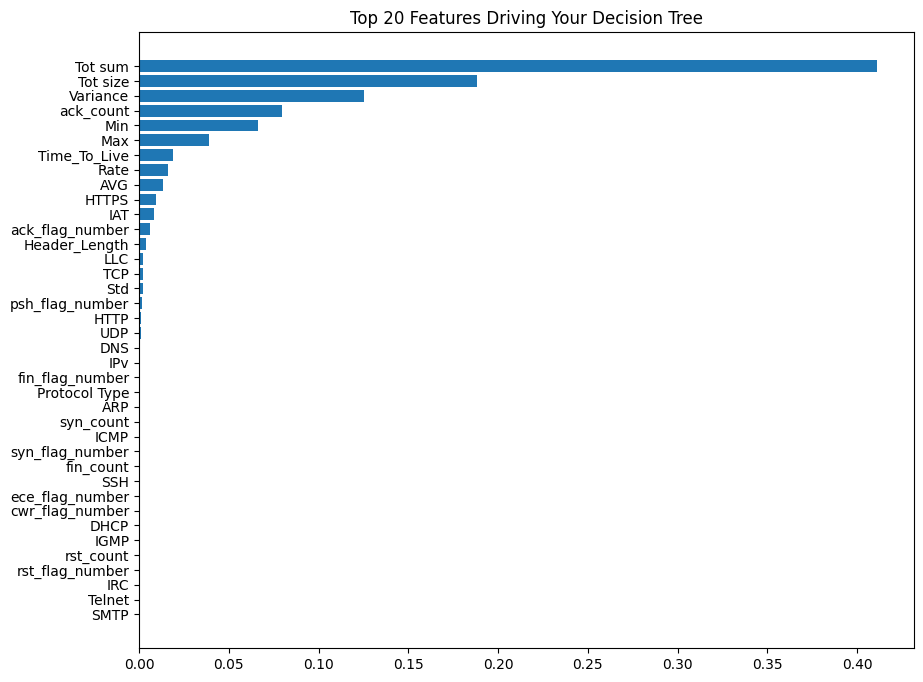

In [44]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load your trained model
# clf = joblib.load("decision_tree_model.joblib")

# Get feature importances
importances = DT.feature_importances_
feature_names = X_train.columns # Make sure X_train is a DataFrame, not numpy array

# Sort and Plota
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_imp_df['Feature'][:42], feature_imp_df['Importance'][:42])
plt.gca().invert_yaxis()
plt.title("Top 20 Features Driving Your Decision Tree")
plt.show()

In [ ]:
(df.columns)

In [ ]:
# Check the average value of HTTPS for Normal vs. Attack
# Assuming 1 = Normal (Benign) and 0 = Attack (from your encoding)
# Or vice versa, depending on how you encoded it.

print(df.groupby('Label')['HTTPS'].mean())

Feature importance analysis revealed that the HTTPS flag is the primary discriminator between benign and malicious traffic. As shown in our analysis, 69.2% of benign IoT traffic utilizes HTTPS, reflecting the standard security posture of modern IoT devices communicating with cloud endpoints.

In contrast, only 11.6% of malicious traffic utilized HTTPS. This stark disparity (a 6x difference) indicates that the majority of volumetric attacks in the CICIoT2023 dataset (e.g., UDP and TCP floods) bypass the computational overhead of encrypted channels to maximize throughput.

This finding supports our Lightweight IDS hypothesis: a simple, low-energy check of protocol headers (validating HTTPS usage) can filter out nearly 90% of malicious traffic without requiring deep packet inspection or complex neural networks.

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Data from your result
# means = [0.692254, 0.116261]
# labels = ['Normal (Benign)', 'Intrusion (Attack)']

# plt.figure(figsize=(8, 6))
# sns.barplot(x=labels, y=means, palette=['green', 'red'])
# plt.ylabel("Proportion of Traffic using HTTPS")
# plt.title("Why HTTPS is the #1 Feature: Usage Gap")
# plt.ylim(0, 1.0)

# # Add percentage labels on top
# for i, v in enumerate(means):
#     plt.text(i, v + 0.02, f"{v*100:.1f}%", ha='center', fontweight='bold')

# plt.show()